In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.style.use('seaborn-poster')

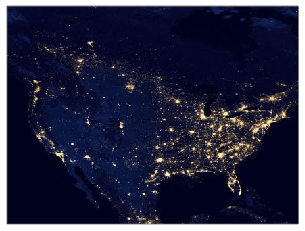

In [2]:
# solution to problem 15
url = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer = 'VIIRS_CityLights_2012'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_wmts(url, layer)
ax.set_extent([-128.75583, -68.01197, 19.50139, 64.85694], crs=ccrs.PlateCarree())
plt.savefig('12.04.11-earth-night.jpg', dpi = 300)
plt.show()

(40, 20) (40, 20) (40, 20)


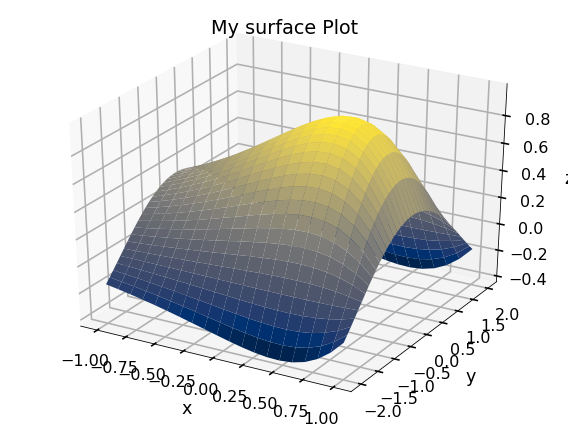

(40, 20) (40, 20) (40, 20)


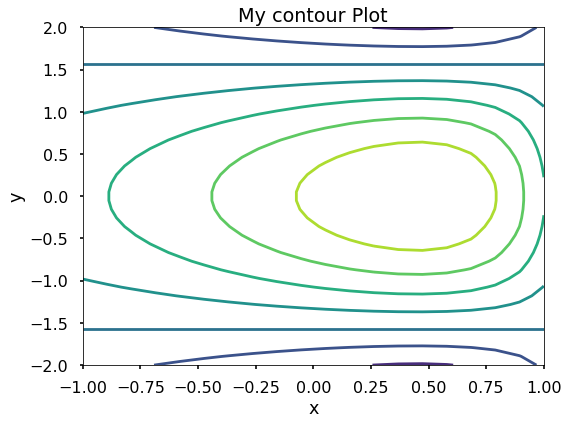

In [3]:
# solution to problem 13
def my_surface_plotter(f, x, y, option):
    
    X, Y = np.meshgrid(x, y)
    
    Z = f(X, Y)
    print(X.shape, Y.shape, Z.shape)
    plt.figure(figsize = (8, 6))
    
    if option == 'surface':
        ax = plt.axes(projection='3d')
        ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
        #ax.grid(False)
        ax.set_xlabel('x', labelpad=20)
        ax.set_ylabel('y', labelpad=20)
        ax.set_zlabel('z', labelpad=20)
    elif option == 'contour':    
        plt.contour(X, Y, Z)
        plt.xlabel('x')
        plt.ylabel('y')
    
    plt.title(f'My {option} Plot')
    plt.tight_layout()
    plt.savefig(f'my_surface_plotter_{option}.jpg', dpi = 300)
    plt.show()
    
from mpl_toolkits import mplot3d

f = lambda x, y: np.cos(y)*np.sin(np.exp(x))
my_surface_plotter(f, np.linspace(-1, 1, 20), np.linspace(-2, 2, 40), 'surface')
my_surface_plotter(f, np.linspace(-1, 1, 20), np.linspace(-2, 2, 40), 'contour')

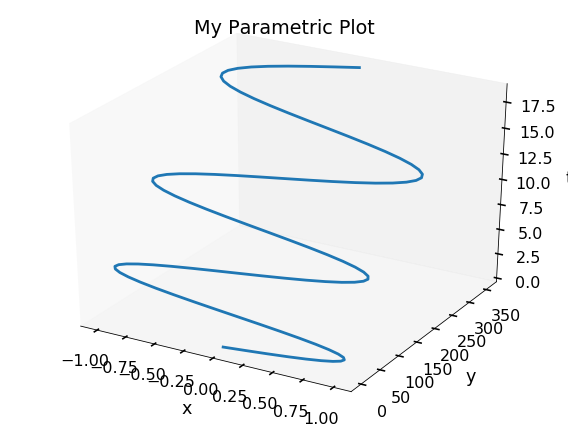

In [4]:
# solution to problem 12
def my_parametric_plotter(x, y, t):
    X = x(t)
    Y = y(t)
    
    plt.figure(figsize = (8, 6))
    ax = plt.axes(projection='3d')
    ax.plot3D(X, Y, t)
    ax.grid(False)
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('t', labelpad=20)
    plt.title(f'My Parametric Plot')
    plt.tight_layout()
    plt.savefig('my_parametric.jpg', dpi = 300)
    plt.show()
    
from mpl_toolkits import mplot3d

f = lambda t: np.sin(t)
g = lambda t: t**2

my_parametric_plotter(f, g, np.linspace(0, 6*np.pi, 100))

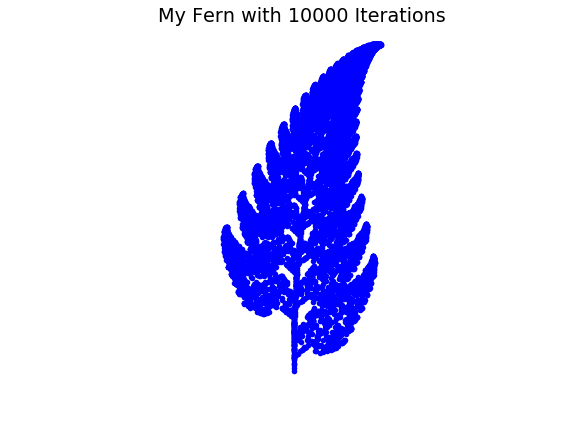

In [5]:
# solution to 11
def my_fern(n):
    
    # add the first p_0 to the list
    p_i = []
    p_i.append([0, 0])
    
    for i in range(1, n):
        p_previous_x = p_i[i-1][0]
        p_previous_y = p_i[i-1][1]
        
        my_choice = np.random.choice(['1_percent', '7_percent_1', '7_percent_2', '85_percent'], \
                                     p = [0.01, 0.07, 0.07, 0.85])
        
        if my_choice == '1_percent':
            p_current_x = 0
            p_current_y = 0.16 * p_previous_y
        elif my_choice == '7_percent_1': 
            p_current_x = 0.2 * p_previous_x - 0.26 * p_previous_y
            p_current_y = 0.23 * p_previous_x + 0.22 * p_previous_y + 1.6
        elif my_choice == '7_percent_2':
            p_current_x = -0.15 * p_previous_x + 0.28 * p_previous_y
            p_current_y = 0.26 * p_previous_x + 0.24 * p_previous_y + 0.44
        elif my_choice == '85_percent':
            p_current_x = 0.85 * p_previous_x + 0.04 * p_previous_y
            p_current_y = -0.04 * p_previous_x + 0.85 * p_previous_y + 1.6
            
        p_i.append([p_current_x, p_current_y])
        
    p_i = np.array(p_i)
    plt.figure(figsize = (8, 6))
    plt.plot(p_i[:, 0], p_i[:, 1], 'b.')
    plt.axis('equal')
    plt.title(f'My Fern with {n} Iterations')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('my_fern.jpg', dpi = 300)
    plt.show()
    
my_fern(10000)

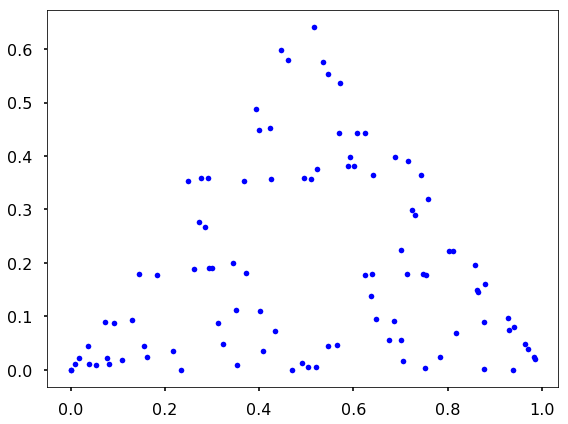

In [6]:
# solution to 10
def my_sierpinski(n):
    
    # define the 3 corner of an equilateral triangle
    P_1 = (0, 0)
    P_2 = (0.5, np.sqrt(2)/2.)
    P_3 = (1, 0)
    
    corners = [P_1, P_2, P_3]
    
    # add the first p_0 to the list
    p_i = []
    p_i.append([0, 0])
    
    for i in range(1, n):
        
        # randomly choose 1 corner, the possibility will be 1/3
        P_ix = np.random.choice([0, 1, 2], p = [1/3., 1/3., 1/3.])
        P = corners[P_ix]
        
        # calculate the middle point
        new_loc_x = (p_i[i-1][0] + P[0])/2.
        new_loc_y = (p_i[i-1][1] + P[1])/2.
        
        p_i.append([new_loc_x, new_loc_y])
    
    p_i = np.array(p_i)
    plt.figure(figsize = (8, 6))
    plt.plot(p_i[:, 0], p_i[:, 1], 'b.')
    plt.tight_layout()
    plt.savefig('my_sierpinski.jpg', dpi = 300)
    plt.show()
    
my_sierpinski(100)

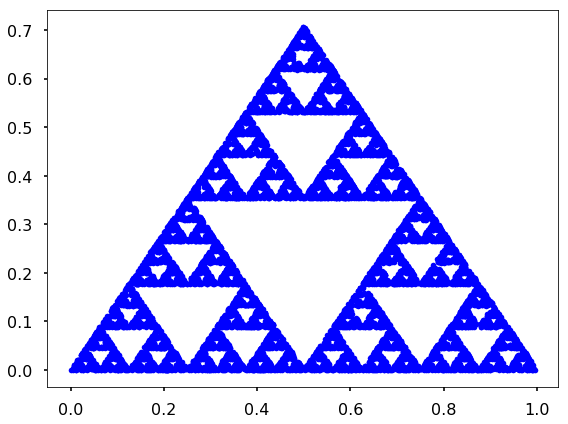

In [7]:
my_sierpinski(10000)

In [8]:
# solution to problem 9
def my_poly_plotter (n,x):
    
    plt.figure(figsize = (8,6))
    for k in range(1, n+1):
        y = x**k
        plt.plot(x,y)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomials up to degree {n}')
    plt.tight_layout()
    plt.savefig('my_poly_plotter.jpg', dpi = 300)
    plt.show()
    

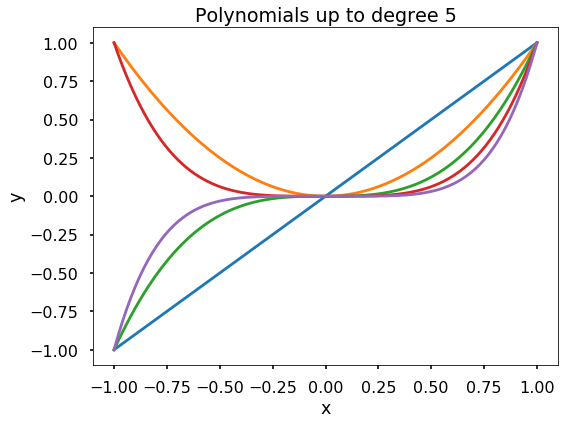

In [9]:
my_poly_plotter(5, np.linspace(-1, 1, 200))

In [10]:
# solution to problem 8
def my_fun_plotter(f, x):
    y = f(x)
    plt.figure(figsize = (8,6))
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.savefig('my_plotter.jpg', dpi = 300)
    plt.show()

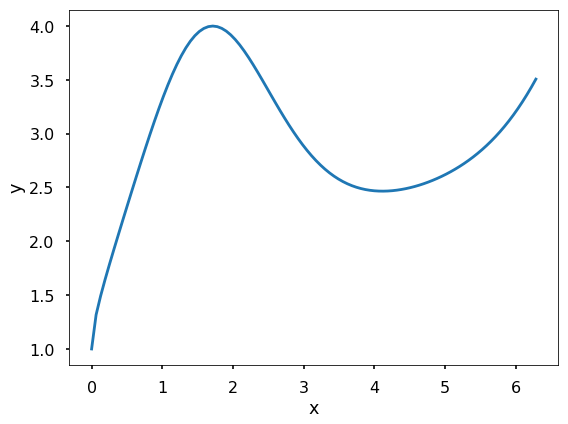

In [11]:
my_fun_plotter(lambda x: np.sqrt(x) + np.exp(np.sin(x)), np.linspace(0, 2*np.pi, 100))

In [12]:
# problem 7 solution
def my_polygon(n_sides):
    '''
    function to plot the n-side polygon
    '''
    radius = 1
    radian_one_segment = np.pi * 2 / n_sides
    xs = []
    ys = []
    for i in range(n_sides):
        x = np.sin(radian_one_segment*i)*radius
        y = np.cos(radian_one_segment*i)*radius
        xs.append(x)
        ys.append(y)
    
    # add the first point to the end to close the polygon
    xs.append(xs[0])
    ys.append(ys[0])
    
    plt.figure(figsize = (8,6))
    plt.plot(xs, ys)
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'My Regular Polygone with {n_sides} sides')
    #plt.xlim(-1, 1)
    #plt.ylim(-1, 1)
    plt.tight_layout()
    plt.savefig(f'My Regular Polygone with {n_sides} sides.jpg', dpi = 300)
    plt.show()

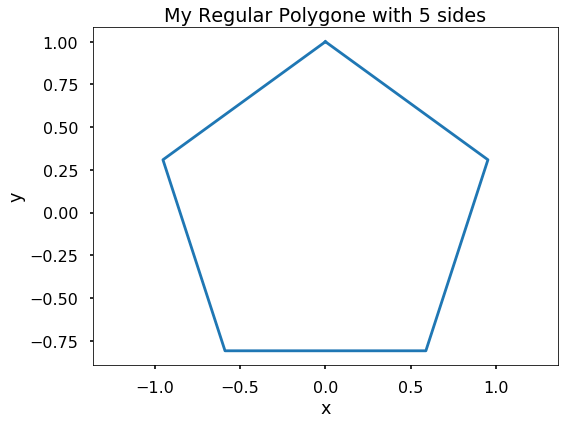

In [13]:
my_polygon(5)